In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/processed/5g_smartphones_dataset.csv')
data.head(10)

,Brand,Price (Rs.),Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Spec Score
0,OPPO,49999,6.83,50.0,50,5800,12,256,91
1,Motorola,20999,6.67,32.0,50,5000,8,128,85
2,Xiaomi,17398,6.67,20.0,50,5110,6,128,85
3,Motorola,16999,6.67,32.0,50,5000,8,128,80
4,OnePlus,26999,6.74,16.0,50,5500,8,128,85
5,OPPO,37999,6.59,50.0,50,5600,8,128,87
6,Motorola,20999,6.40,32.0,50,4310,8,256,87
7,iQOO,54998,6.82,32.0,50,6000,12,256,91
8,OnePlus,21990,6.70,16.0,50,5500,8,128,83
9,iQOO,19998,6.77,16.0,50,5500,8,128,83


In [3]:
data['Brand'].unique()

array(['OPPO', 'Motorola', 'Xiaomi', 'OnePlus', 'iQOO', 'Vivo', 'Realme',
       'Samsung', 'Poco', 'Apple', 'Honor', 'Nothing', 'CMF', 'Infinix',
       'Google', 'Tecno', 'Lava', 'HMD', 'Ulefone', 'Oukitel'],
      dtype=object)

In [4]:
data['Brand'] = data['Brand'].map({'OPPO':0, 'Motorola':1, 'Xiaomi':2, 'OnePlus':3, 'iQOO':4, 'Vivo':5, 'Realme':6, 'Samsung':7, 'Poco':8, 'Apple':9, 'Honor':10, 'Nothing':11, 'CMF':12, 'Infinix':13, 'Google':14, 'Tecno':15, 'Lava':16, 'HMD':17, 'Ulefone':18, 'Oukitel':19})
data.head(10)

,Brand,Price (Rs.),Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Spec Score
0,0,49999,6.83,50.0,50,5800,12,256,91
1,1,20999,6.67,32.0,50,5000,8,128,85
2,2,17398,6.67,20.0,50,5110,6,128,85
3,1,16999,6.67,32.0,50,5000,8,128,80
4,3,26999,6.74,16.0,50,5500,8,128,85
5,0,37999,6.59,50.0,50,5600,8,128,87
6,1,20999,6.40,32.0,50,4310,8,256,87
7,4,54998,6.82,32.0,50,6000,12,256,91
8,3,21990,6.70,16.0,50,5500,8,128,83
9,4,19998,6.77,16.0,50,5500,8,128,83


In [5]:
data['Brand'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [6]:
print(f"Dataset Shape: {data.shape}")
print("\nBasic Statistics:")
print(data.drop(['Brand'],axis=1).describe())

Dataset Shape: (305, 9)

Basic Statistics:
         Price (Rs.)  Screen Size (in)  Front Camera (MP)  Back Camera (MP)  \
count     305.000000        305.000000         305.000000        305.000000   
mean    31602.645902          6.678197          23.231148         59.003279   
std     28321.830927          0.131985          14.369988         26.466028   
min      7999.000000          6.100000           5.000000          8.000000   
25%     15620.000000          6.670000          12.000000         50.000000   
50%     22945.000000          6.700000          16.000000         50.000000   
75%     33999.000000          6.780000          32.000000         50.000000   
max    177900.000000          6.900000          50.000000        200.000000   

       Battery (mAh)    RAM (GB)     ROM (GB)  Spec Score  
count     305.000000  305.000000   305.000000  305.000000  
mean     5184.885246    8.780328   240.262295   83.832787  
std       714.990299    2.857517   147.583819    5.430322  
min  

In [7]:
# Correlation
correlation_matrix = data.corr()
print("\nCorrelations with Price:")
print(correlation_matrix['Price (Rs.)'].sort_values(ascending=False))
print("\nCorrelations with Spec Score:")
print(correlation_matrix['Spec Score'].sort_values(ascending=False))


Correlations with Price:
Price (Rs.)          1.000000
ROM (GB)             0.663675
Spec Score           0.654824
RAM (GB)             0.451908
Back Camera (MP)     0.169446
Front Camera (MP)    0.130055
Brand                0.056041
Battery (mAh)       -0.099807
Screen Size (in)    -0.132950
Name: Price (Rs.), dtype: float64

Correlations with Spec Score:
Spec Score           1.000000
RAM (GB)             0.778802
Price (Rs.)          0.654824
ROM (GB)             0.643446
Front Camera (MP)    0.557169
Back Camera (MP)     0.270520
Screen Size (in)     0.072828
Battery (mAh)        0.038033
Brand               -0.061641
Name: Spec Score, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

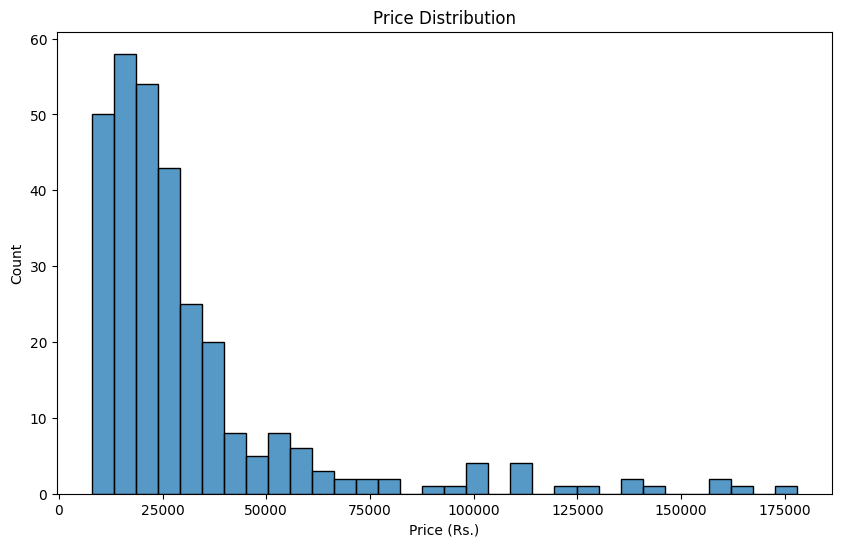

In [9]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Price (Rs.)'])
plt.title('Price Distribution')
plt.show()

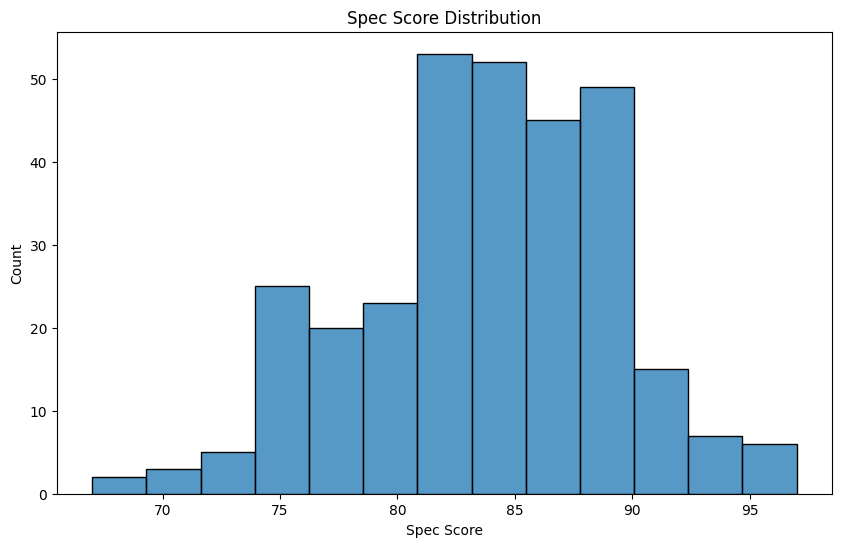

In [10]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Spec Score'])
plt.title('Spec Score Distribution')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price (Rs.)', 'Spec Score'], axis=1)

In [12]:
X

,Brand,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB)
0,0,6.83,50.0,50,5800,12,256
1,1,6.67,32.0,50,5000,8,128
2,2,6.67,20.0,50,5110,6,128
3,1,6.67,32.0,50,5000,8,128
4,3,6.74,16.0,50,5500,8,128
...,...,...,...,...,...,...,...
300,3,6.78,16.0,50,5500,16,256
301,19,6.60,8.0,48,6500,4,256
302,18,6.78,32.0,64,10600,12,256
303,19,6.60,32.0,64,11000,6,256


In [13]:
y = data[['Price (Rs.)', 'Spec Score']]
y

,Price (Rs.),Spec Score
0,49999,91
1,20999,85
2,17398,85
3,16999,80
4,26999,85
...,...,...
300,49999,88
301,34899,76
302,53500,91
303,36699,85


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import xgboost as xgb

In [18]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [19]:
from sklearn.multioutput import MultiOutputRegressor

In [20]:
multi_model = MultiOutputRegressor(xgb_model)
multi_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [21]:
multi_model.score(X_test_scaled,y_test)

0.891501784324646

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_pred = multi_model.predict(X_test_scaled)

# MAE and RMSE for each target
mae_price = mean_absolute_error(y_test.iloc[:, 0], y_pred[:, 0])
rmse_price = np.sqrt(mean_squared_error(y_test.iloc[:, 0], y_pred[:, 0]))

mae_spec = mean_absolute_error(y_test.iloc[:, 1], y_pred[:, 1])
rmse_spec = np.sqrt(mean_squared_error(y_test.iloc[:, 1], y_pred[:, 1]))

print("MAE (Price):", mae_price)
print("RMSE (Price):", rmse_price)
print("MAE (Spec Score):", mae_spec)
print("RMSE (Spec Score):", rmse_spec)

MAE (Price): 6183.00830078125
RMSE (Price): 10667.978627650133
MAE (Spec Score): 1.3400737047195435
RMSE (Spec Score): 2.0154831710714713


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(multi_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.87337232 0.92359781 0.85541999 0.84670478 0.60989171]
Mean CV Score: 0.8217973232269287


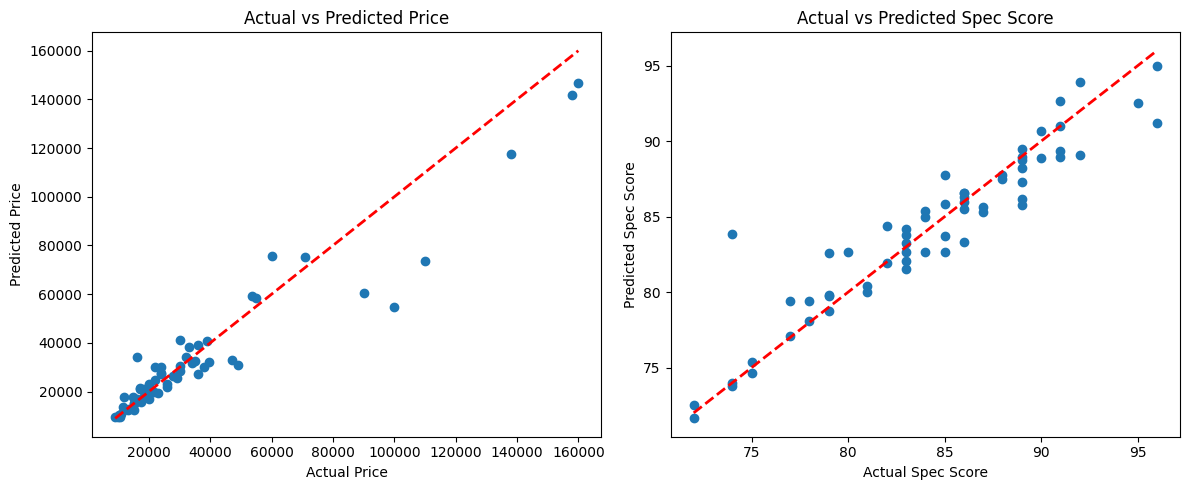

In [24]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 5))

# Price predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test['Price (Rs.)'], y_pred[:, 0])
plt.plot([y_test['Price (Rs.)'].min(), y_test['Price (Rs.)'].max()], [y_test['Price (Rs.)'].min(), y_test['Price (Rs.)'].max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

# Spec Score predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test['Spec Score'], y_pred[:, 1])
plt.plot([y_test['Spec Score'].min(), y_test['Spec Score'].max()], [y_test['Spec Score'].min(), y_test['Spec Score'].max()], 'r--', lw=2)
plt.xlabel('Actual Spec Score')
plt.ylabel('Predicted Spec Score')
plt.title('Actual vs Predicted Spec Score')
plt.tight_layout()
plt.show()

In [25]:
import pickle

In [26]:
pickle.dump(multi_model, open('../models/model.pkl', 'wb'))